In [50]:
import os
import sys
from pathlib import Path
path = str(Path(os.getcwd()))
sys.path.insert(1, path+'/amazon-braket-community-detection/src')

In [51]:
sys.path

['/Users/haikelhaikel/QuantathonSEA2025/QRenew',
 '/Users/haikelhaikel/QuantathonSEA2025/QRenew/amazon-braket-community-detection/src',
 '/Users/haikelhaikel/QuantathonSEA2025/QRenew/amazon-braket-community-detection/src',
 '/Users/haikelhaikel/QuantathonSEA2025/QRenew/amazon-braket-community-detection/src',
 '/opt/anaconda3/lib/python312.zip',
 '/opt/anaconda3/lib/python3.12',
 '/opt/anaconda3/lib/python3.12/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.12/site-packages',
 '/opt/anaconda3/lib/python3.12/site-packages/aeosa']

In [52]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from geopy.distance import geodesic
import networkx as nx

df = pd.read_csv(path+'/database/SolarPowerPlants_TH.csv', delimiter=',', skiprows=1)
df

,WKT,Index,latitude,longitude,name,capacity(MW)
0,POINT (100.1995973 13.5797688),1,13.579769,100.199597,Samut Sakhon,5.0
1,POINT (100.4800113 13.7131258),2,13.713126,100.480011,The Mall - Tha Phra,1.0
2,POINT (100.4474445 13.8199492),3,13.819949,100.447445,Ratchaphruek,1.0
3,POINT (100.5417601 13.8550947),4,13.855095,100.541760,The Mall - Ngamwongwan,1.0
4,POINT (100.6421705 13.7658514),5,13.765851,100.642171,The Mall - Bangkapi,1.0
5,POINT (100.6798205 13.8282182),6,13.828218,100.679821,Akekamai-Ramintra,1.0
6,POINT (101.0033703 13.5759609),7,13.575961,101.003370,Chachoengsao,1.3
7,POINT (100.5528226 14.1690859),8,14.169086,100.552823,Bangchak,16.0
8,POINT (100.5530586 14.1689819),9,14.168982,100.553059,Bangchak III,25.0
9,POINT (100.1837652 13.9754302),10,13.975430,100.183765,Sai Thong,6.1


In [53]:
ind = df['Index']
name = df['name']
lat = df['latitude']
long = df['longitude']
capacity = df['capacity(MW)']

In [54]:
locations = {ind: (lat, long) for ind, lat, long in zip(ind, lat, long)}
locations

{1: (13.5797688, 100.1995973),
 2: (13.7131258, 100.4800113),
 3: (13.8199492, 100.4474445),
 4: (13.8550947, 100.5417601),
 5: (13.7658514, 100.6421705),
 6: (13.8282182, 100.6798205),
 7: (13.5759609, 101.0033703),
 8: (14.1690859, 100.5528226),
 9: (14.1689819, 100.5530586),
 10: (13.9754302, 100.1837652),
 11: (13.9840662, 100.1962857),
 12: (14.0004893, 100.200201),
 13: (14.1076288, 100.1737777),
 14: (14.1367617, 100.1432434),
 15: (14.1383847, 100.1506249),
 16: (14.1542604, 100.1377288),
 17: (14.2224476, 100.1128729),
 18: (14.2446193, 100.1275879),
 19: (14.3219005, 100.3022163),
 20: (14.2172742, 100.2778664)}

In [55]:
(len(locations.keys()))

20

In [56]:

# noconsumers = 10
# c_energy = np.random.default_rng().normal(loc=np.average(capacity), scale=np.std(capacity)/2, size=noconsumers)
# # c_energy = np.random.default_rng().integers(low=min(capacity), high=max(capacity), size=10)
# c_energy

In [57]:
def calculate_distance_mgpp(mglat, mglong, pplat, pplong):    
    distance_matrix = np.zeros(len(pplat))
    for i in range(len(pplat)):
        distance_matrix[i] = geodesic((mglat, mglong), (pplat[i], pplong[i])).km
    return distance_matrix


In [58]:
def calculate_distance_mgmg(mglat, mglong):    
    distance_matrix = np.zeros((len(mglat), len(mglat)))
    for i in range(len(mglat)):
        for j in range(len(mglat)):
            if i < j:
                distance_matrix[i][j] = geodesic((mglat[i], mglong[i]), (mglat[j], mglong[j])).km
    return distance_matrix

In [59]:
def create_transmission_network(locations, distance_matrix, threshold=45):
    G = nx.Graph()
    for i, label_i in enumerate(locations.keys()):
        for j, label_j in enumerate(locations.keys()):
            if i < j:
                if distance_matrix[i][j] < threshold: # Only add edge if distance is below threshold
                    G.add_edge(label_i, label_j)
    return G

In [60]:
print(enumerate(locations.keys()))

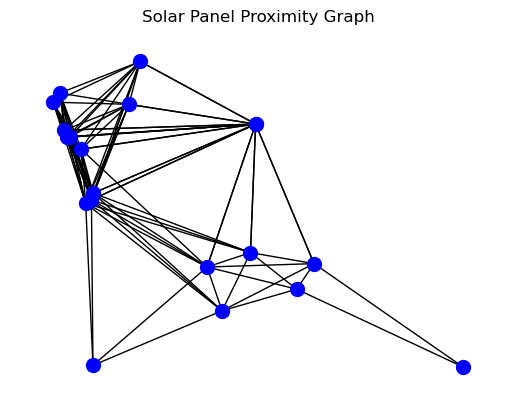

In [61]:
distance_matrix = calculate_distance_mgmg(lat, long)

# Create Graph Based on Distance Threshold
G = create_transmission_network(locations, distance_matrix, threshold=45)

# Visualize Graph
fig, ax = plt.subplots()
pos = {label: (lon, lat) for label, (lat, lon) in locations.items()}
nx.draw(G, pos, ax=ax, node_size=100, node_color='blue')
# nx.draw(G, pos, ax=ax, node_size=800, with_labels=True)
# with_labels=True, node_color='lightblue', node_size=800)
plt.title("Solar Panel Proximity Graph")
plt.show()

In [62]:
G

In [63]:
G.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 3, {}), (1, 10, {}), (1, 11, {}), (2, 3, {}), (2, 4, {}), (2, 5, {}), (2, 6, {}), (2, 10, {}), (2, 11, {}), (2, 12, {}), (3, 4, {}), (3, 5, {}), (3, 6, {}), (3, 8, {}), (3, 9, {}), (3, 10, {}), (3, 11, {}), (3, 12, {}), (3, 13, {}), (10, 4, {}), (10, 11, {}), (10, 12, {}), (10, 13, {}), (10, 14, {}), (10, 15, {}), (10, 16, {}), (10, 17, {}), (10, 18, {}), (10, 19, {}), (10, 20, {}), (11, 4, {}), (11, 8, {}), (11, 9, {}), (11, 12, {}), (11, 13, {}), (11, 14, {}), (11, 15, {}), (11, 16, {}), (11, 17, {}), (11, 18, {}), (11, 19, {}), (11, 20, {}), (4, 5, {}), (4, 6, {}), (4, 8, {}), (4, 9, {}), (4, 12, {}), (5, 6, {}), (5, 7, {}), (6, 7, {}), (6, 8, {}), (6, 9, {}), (12, 8, {}), (12, 9, {}), (12, 13, {}), (12, 14, {}), (12, 15, {}), (12, 16, {}), (12, 17, {}), (12, 18, {}), (12, 19, {}), (12, 20, {}), (8, 9, {}), (8, 13, {}), (8, 14, {}), (8, 15, {}), (8, 16, {}), (8, 19, {}), (8, 20, {}), (9, 13, {}), (9, 14, {}), (9, 15, {}), (9, 16, {}), (9, 19, {}), (9, 2

In [64]:
total_nodes = len(G.nodes(data=True))
total_edges = len(G.edges(data=True))

In [65]:
def H_distance(distance_matrix, total_nodes, threshold=45, alpha=1):
    H = np.zeros((total_nodes, total_nodes))
    for i in range(total_nodes):
        for j in range(total_nodes):
            if i < j:
                if distance_matrix[i][j] < threshold:
                    delta = 1
                else:
                    delta = 0
                H[i][j] = delta*distance_matrix[i][j]
    return alpha*H

In [66]:
import scipy.sparse as sp
from networkx.algorithms import community

### create QUBO matrix

# define the distance matrix
num_powerplants = (len(locations.keys())) ## number of solar power plants
pplat, pplong = zip(*locations.values())

In [67]:
# generate choices for microgrid locations
num_microgrids = 20 ## number of microgrids
random_lat = np.random.uniform(min(lat), max(lat), size=4*num_microgrids)
lat_choices = np.random.choice(random_lat, size=num_microgrids, replace=False)

random_long = np.random.uniform(min(long), max(long), size=4*num_microgrids)
long_choices = np.random.choice(random_long, size=num_microgrids, replace=False)

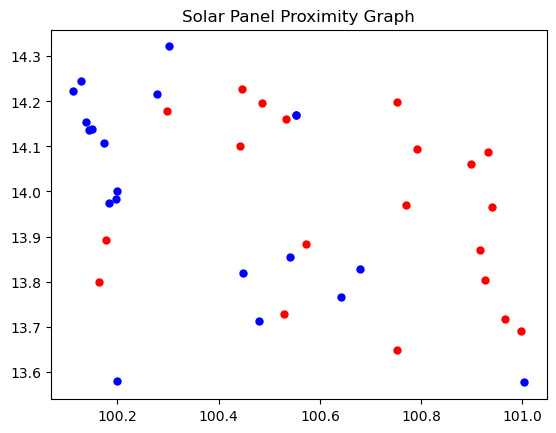

In [68]:
# Visualize Graph
fig, ax = plt.subplots()
ax.plot(long, lat, 'o', markersize=5, color='blue')
ax.plot(long_choices, lat_choices, 'o', markersize=5, color='red')
plt.title("Solar Panel Proximity Graph")
plt.show()

In [69]:
i=0
mgpp_distance = calculate_distance_mgpp(lat_choices[i], long_choices[i],pplat, pplong)
mgpp_distance

array([97.09630625, 64.07404518, 60.14467865, 49.38881639, 47.45622044,
       39.60888414, 57.26369591, 41.81791657, 41.79058036, 81.71116728,
       80.23006899, 79.56551432, 81.82616373, 85.25719406, 84.47289048,
       85.9898348 , 89.58448685, 88.45933591, 72.63405305, 71.96181842])

In [70]:
mgmg_distance = calculate_distance_mgmg(lat_choices, long_choices)
mgmg_distance

array([[ 0.        , 24.22635707, 44.90327706, 84.19954751, 43.66791662,
        59.09199763, 54.50129422, 49.51067229, 15.13651519, 44.58033351,
        31.51414504, 41.36949625, 89.05081937, 22.81385513, 13.72380979,
        52.74212076, 69.18958067, 21.88780171, 52.54789994,  4.76164145],
       [ 0.        ,  0.        , 37.10618136, 79.77727425, 52.38273447,
        44.75827073, 64.27443326, 58.79819228, 28.26190042, 21.71535042,
         7.43018282, 17.87751171, 81.80919504, 40.36921215, 10.79990897,
        57.06192851, 75.03368001, 19.29846643, 30.38129024, 21.10178546],
       [ 0.        ,  0.        ,  0.        , 42.67258453, 31.11142789,
        17.89394319, 40.49607042, 35.90357199, 33.23885429, 50.62926493,
        39.22764387, 46.37313574, 45.32218102, 39.88596765, 40.70314439,
        27.78051609, 44.19639886, 23.29111979, 32.51023   , 40.24117756],
       [ 0.        ,  0.        ,  0.        ,  0.        , 48.59938245,
        42.08042008, 47.10319747, 47.28558323, 6